In [6]:
#spline graphs
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize
from scipy.interpolate import UnivariateSpline
import warnings
from scipy.signal import savgol_filter
import sympy as sp
plt.rcParams["font.family"] = "serif"

In [38]:
#only cell in need of changing between runs
inputfile = ('/scratch/jak491/npz_storage/vol_covering_grid_den0.npz','/scratch/jak491/npz_storage/vol_covering_grid_den1.npz','/scratch/jak491/npz_storage/vol_covering_grid_den2.npz', '/scratch/jak491/npz_storage/vol_covering_grid_den3.npz', '/scratch/jak491/npz_storage/vol_covering_grid_den4.npz', '/scratch/jak491/npz_storage/vol_covering_grid_den5.npz', '/scratch/jak491/npz_storage/vol_covering_grid_den_high.npz')
percent = 0
perc = '0'
#titles = ('10% SFE\nG','10% SFE\nG+T','10% SFE\nG+T+M','6% SFE\nG+T+M+P' )


In [39]:
#define Log Normal function
def lognorm(x,mu,sigma):
   return np.log((1/(np.sqrt(2*np.pi*sigma**2)))*(np.exp(-((x-mu)**2)/(2*sigma**2))))
def lognorm_deriv1(x,mu,sigma):
   return (-x-mu)/sigma**2
def linear_ex(x_linear):
    return -3.5
sigma = .6
mu = -.2
x_example = np.linspace(-3,6,num=100)
y_ex = lognorm(x_example,mu,sigma)
y_example = np.exp(y_ex)
y_log_deriv1 = lognorm_deriv1(x_example,mu,sigma)
y_log_deriv2 = np.ones(len(x_example))*(-1/sigma**2)

#power law!
def power_ex(x_power, slope_example,m):
    return m*(x_power)**slope_example
y_int = .03
x_start = 1.35
slope_example = -3.0
m = y_int/(np.exp(x_start)**slope_example)
#what I plot
x_power = np.linspace(x_start,6,num=1000)
e_x_power = np.exp(x_power)
y_power = power_ex(e_x_power,slope_example,m)
#derivatives

y_power_1st = np.ones(len(x_power))*slope_example
y_power_2nd = np.zeros(len(x_power))

In [40]:
#plot setup
titles = ('Gravity ', 'Turbulence','B-Fields', 'All + Outflows')

d = {}
variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')
input_file = inputfile[percent]
plot_data = np.load(input_file, allow_pickle=True)

starting
0
1
2
3


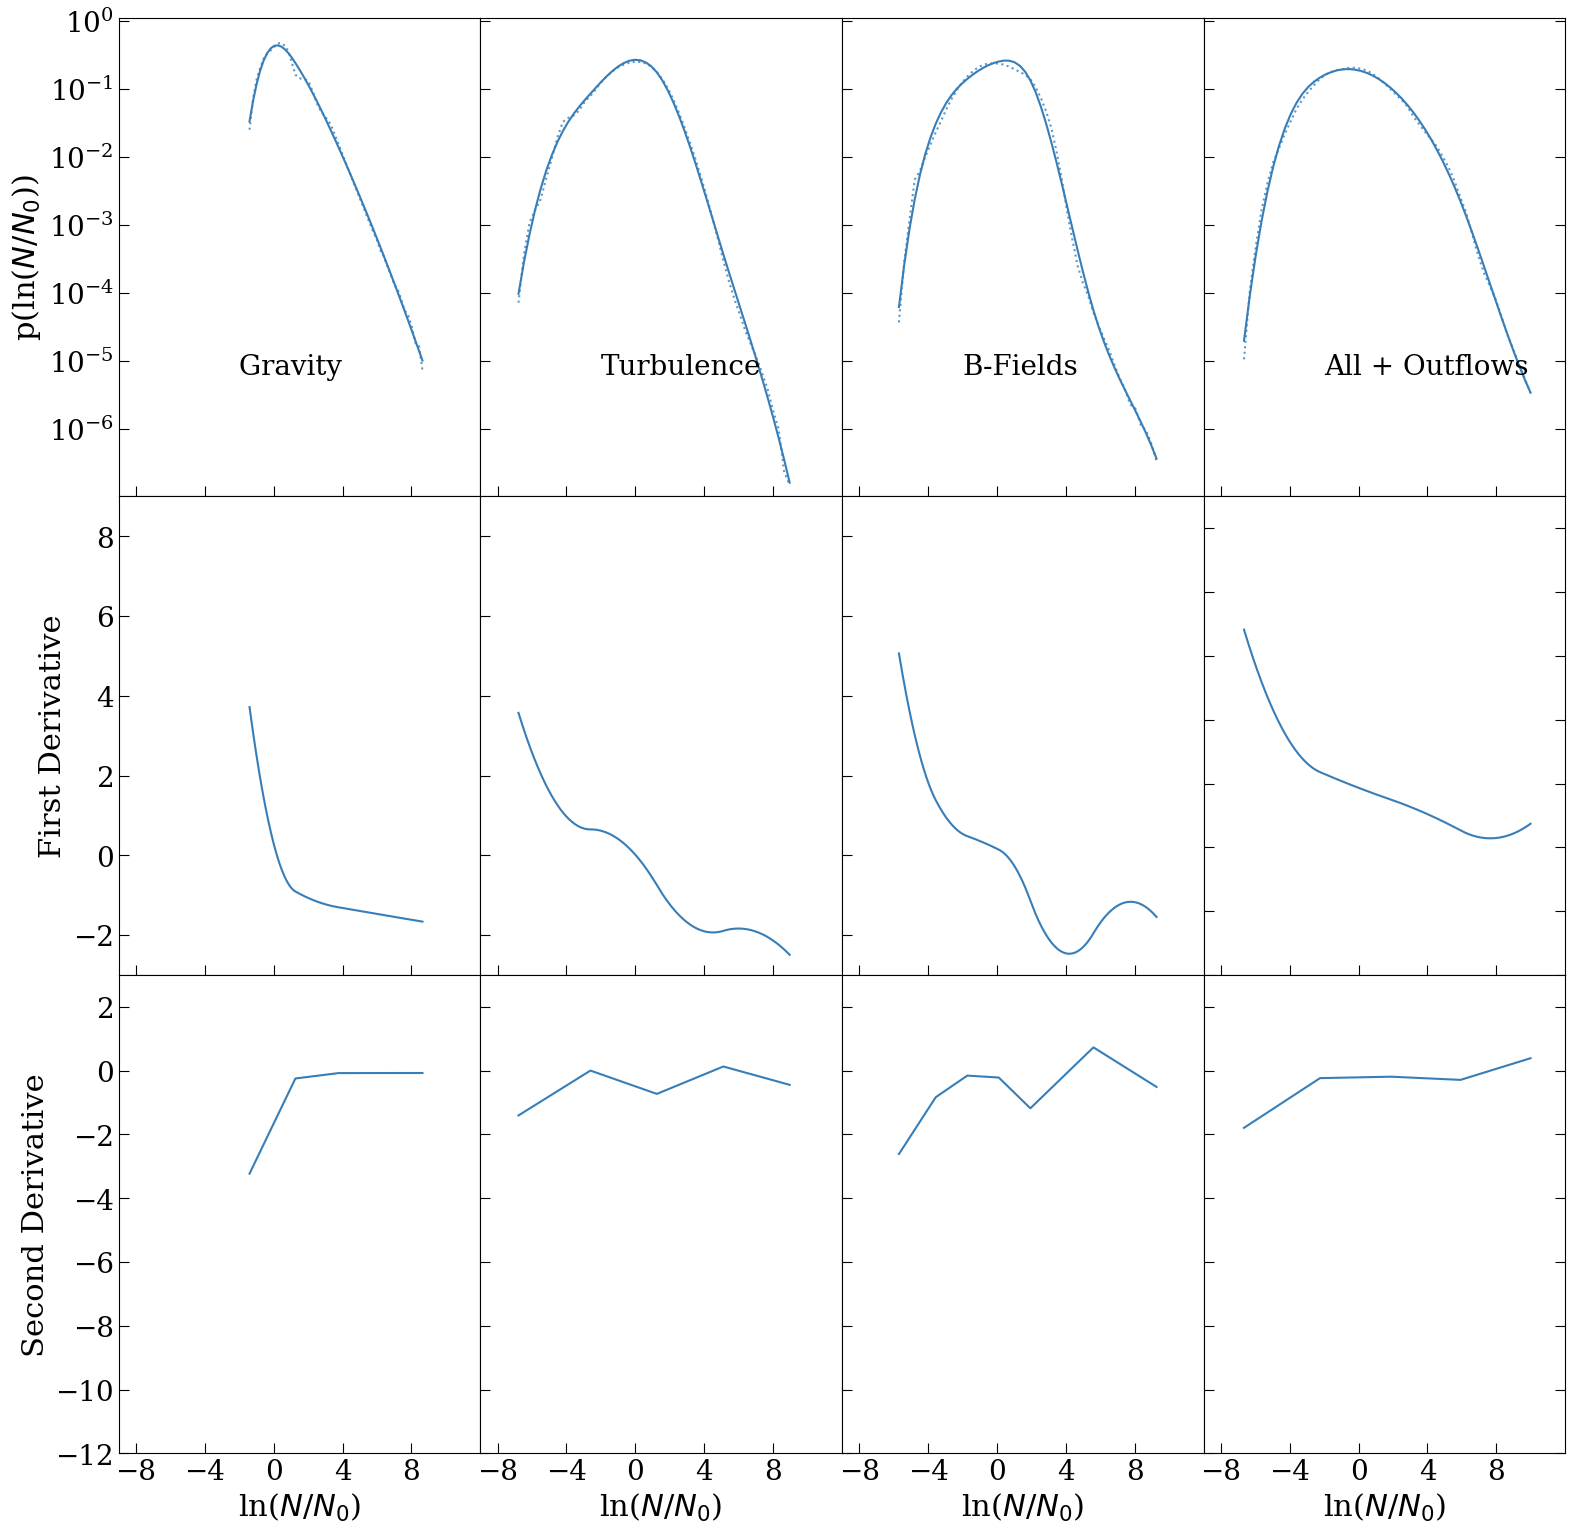

time: 0.5446645736694335


In [41]:
#main processing cell
warnings.filterwarnings('ignore')


start = time.time()
print('starting')
spline_slope = []
slopes = []
error = []
trans_point = []
color_list = ('#377eb8', '#ff7f00', '#4daf4a')#('b', 'r', 'green')
fig, ax = plt.subplots(nrows=3,ncols=4,figsize=(16,16),sharex = 'all', sharey = 'row', gridspec_kw={'hspace': 0,'wspace':0})
ax =ax.ravel()
#plt.suptitle('Column Densities and Spline with ' + perc + '% SFE', size =30)
b = 0
ax[0].plot(100,100, color = color_list[0], alpha =1)
ax[0].plot(100,100, color = color_list[1], alpha =1)
ax[0].plot(100,100, color = color_list[2], alpha =1)
#ax[0].plot(100,100, color = 'black', alpha =.5)


#legend1 = ax[0].legend([ 'x', 'y', 'z'], loc = 'upper right', fontsize = 20)

#leg4 =ax[0].plot(100,100, color = 'black', alpha =.3)
#leg5 =ax[0].plot(100,100, color = 'black', alpha =1, linestyle = ':')
#legend2 = ax[0].legend([leg4,leg5],['column density','spline fit'], loc = 'lower right')
#ax[0].add_artist(legend1)
num_loop = 0 #records which specific column density we are on
for n in range(4):
    den = plot_data[plot_data.files[n]]
    color_list = ('#377eb8', '#ff7f00', '#4daf4a')#('b', 'r', 'green')
    print(n)     #for time keeping
    
    for a in (range(1)):
        xx =[]
        y = []
        spline = []
        z_check = 1
        log_den_d = plot_data[plot_data.files[b]]
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
        b = b+1
        
        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)

        for i in range(len(bin_list)):
            
            if counts_d[i] > 0:
                    xx.append(bin_list[i])
                    y.append(counts_d[i])
            else:
                break
        x = np.linspace(min(xx), max(xx), 500)
        counts_filtered = savgol_filter(np.log(y), 17, 3) #(np.log(y), window length (odd number), power of polynomial)

        spl = UnivariateSpline(xx, counts_filtered, k = 3, s = .3)
        pdf_density_fit = x
        pdf_counts_fit = np.exp(spl(x))
        ax[n].plot(bin_list, counts_d, color = color_list[a], alpha = .8, linestyle = ':')
        ax[n].plot(xx, np.exp(spl(xx)), label = 'fit', color =color_list[a])
        #overplot example curve and its derivatives
        #ax[n].plot(x_example,y_example, color = 'black', alpha = .3,linestyle = '--')
        #ax[n+4].plot(x_example,y_log_deriv1, color = 'black', alpha = .3, linestyle = '--')
        #ax[n+8].plot(x_example,y_log_deriv2, color = 'black', alpha = .3, linestyle = '--')
        
        deriv = spl.derivative(1)
        first_deriv = deriv(x)
        pdf_counts_deriv = deriv(x)
        ax[n+4].plot(x, first_deriv, label = 'fit',color =color_list[a])
    #example_1st_deriv = deriv(x_example)
    #ax[n+4].plot(x_example,example_1st_deriv, color = 'black',alpha = .5)
        #second derivative
        deriv_2 = spl.derivative(2)
        second_deriv = deriv_2(x)
        ax[n+8].plot(x, second_deriv, label = 'fit',color =color_list[a])
            
        #overplot power law example
        #ax[n].plot(x_power,y_power, color = 'black', alpha = .3,linestyle = '-.')
        #ax[n+4].plot(x_power,y_power_1st, color = 'black', alpha = .3,linestyle = '-.')
        #ax[n+8].plot(x_power,y_power_2nd, color = 'black', alpha = .3,linestyle = '-.')
        #
#recording spline transition point
        z = 0
        for X in x:
            if percent == 1:

                if X > 1:
                    if X < 2:
                        spline.append(pdf_counts_deriv[z])
                    if second_deriv[z]>0:
                        if len(trans_point) <= num_loop:
                            trans_point.append(x[z])
                            
            #recording spline transition point 
            else:
                if X > 0:
                    if second_deriv[z-1]<0:
                        if second_deriv[z]>0:
                            trans_point.append(x[z])
                            spline_slope.append(pdf_counts_deriv[z])
                            break
            z = z+1
        if len(spline) > 0:  
            spline_slope.append(sum(spline)/len(spline))
        #recording spline slope
        #spline_slope.append(first_deriv[z])
        num_loop = num_loop + 1




        
    #if n > 1:
    ax[n+8].set_xlabel(r'ln($N/N_0$)', size=22)
    #if n == 0 or n == 2:
    ax[0].set_ylabel(r'p(ln($N/N_0$))', size=22)
    ax[4].set_ylabel(r'First Derivative', size=22)
    ax[8].set_ylabel(r'Second Derivative', size=22)

  #  if n == 0 or n == 2:
  #     ax[n+4].set_ylabel(r'p(ln($N/N_0$))', size=15)
    

    ax[n].annotate(titles[n],[-2,10**(-5.2)], size =20)
    #ax[n+4].annotate(titles[n],[-2,-6.5], size =15)
    ax[n].set_yscale('log')
    #ax[n].set_xscale('log')
    #ax[n].set_ylim(10**(-6),1)
    #ax[n].set_xlim(-3,6)
    ax[n].tick_params(direction='in', length=7, labelsize = 20, which = 'major')
    ax[n].tick_params(direction='in', length=3, labelsize = 20, which = 'minor')
    ax[n+4].tick_params(direction='in', length=7, labelsize = 20, which = 'major')
    ax[n+4].tick_params(direction='in', length=3, labelsize = 20, which = 'minor')
    ax[n+8].tick_params(direction='in', length=7, labelsize = 20, which = 'major')
    ax[n+8].tick_params(direction='in', length=3, labelsize = 20, which = 'minor')
    #'''
    if n == 3:
        ax[n].tick_params(direction='in', length=7, labelsize = 20, which = 'major',right = True)
        ax[n].tick_params(direction='in', length=3, labelsize = 20, which = 'minor',right = True)
        ax[n+4].tick_params(direction='in', length=7, labelsize = 20, which = 'major',right = True)
        ax[n+4].tick_params(direction='in', length=3, labelsize = 20, which = 'minor',right = True)
        ax[n+8].tick_params(direction='in', length=7, labelsize = 20, which = 'major',right = True)
        ax[n+8].tick_params(direction='in', length=3, labelsize = 20, which = 'minor',right = True)
    
    ax[n].set_yticks((1e0,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6))
    ax[n+4].set_yscale('linear')
    ax[n].set_ylim(10**(-7),1.1)
    ax[n+4].set_ylim(-3,9)
    ax[n+8].set_ylim(-12,3)

    ax[n].set_xlim(-9,12)
    ax[n+4].set_xlim(-9,12)
    ax[n+8].set_xlim(-9,12)

    ax[n+4].set_yticks((8,6,4,2,0,-2,-4,-6))
    #if n >0:
    ax[n+8].set_xticks((-8,-4,0,4,8))
#ax[8].set_xticks((-2.5,0,2.5,5))

plt.tight_layout()
plt.subplots_adjust(top=.95)
plt.savefig('vol_spline_4lv_'+perc+'%.pdf', bbox_inches='tight', format = 'pdf')
plt.show()

file = open("txt_file_storage/vol_spline_slope" +perc+"%.txt", "w")
str_dictionary = repr(spline_slope)
file.write(str_dictionary + "\n")
#str_dictionary = repr(slopes_error)
#file.write(str_dictionary + "\n")
file.close()

file = open("txt_file_storage/vol_trans_point" +perc+"%.txt", "w")
str_dictionary = repr(trans_point)
file.write(str_dictionary + "\n")
file.close()

end = time.time()
print("time:",(end-start)/60)

In [43]:
spline_slope

[-1.9330749322568006, -2.4666967077753292, -1.715644233238039]

starting
3


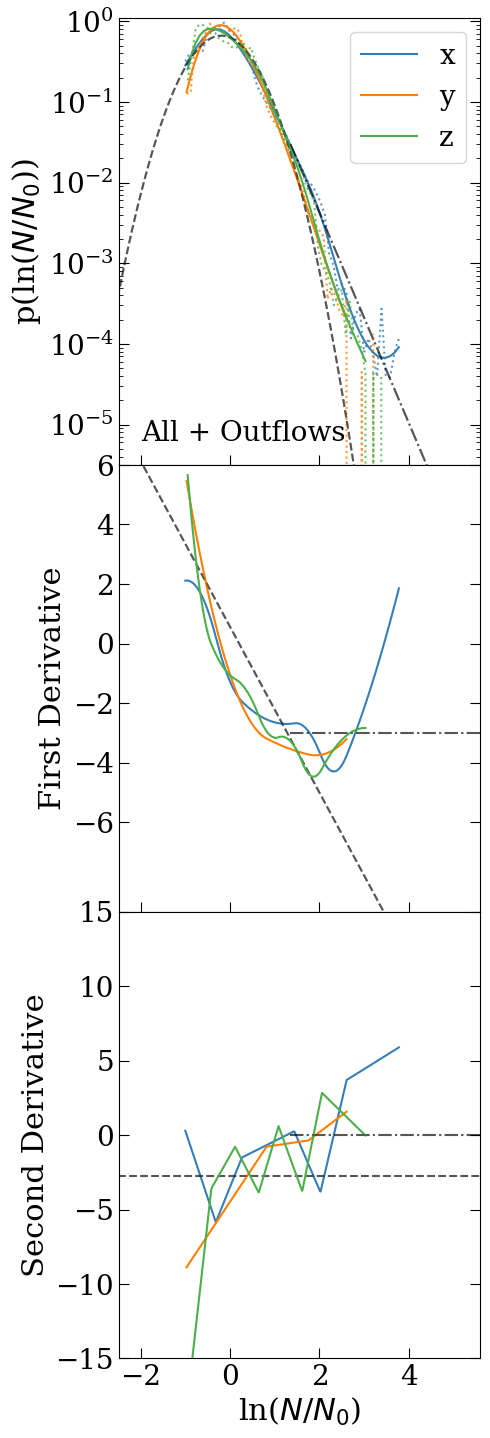

time: 0.3434378703435262


In [7]:
#main processing cell
warnings.filterwarnings('ignore')


start = time.time()
print('starting')
spline_slope = []
slopes = []
error = []
trans_point = []
color_list = ('#377eb8', '#ff7f00', '#4daf4a')#('b', 'r', 'green')
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(5,15),sharex = 'all', sharey = 'row', gridspec_kw={'hspace': 0,'wspace':0})
ax =ax.ravel()
#plt.suptitle('Column Densities and Spline with ' + perc + '% SFE', size =30)
b = 0
ax[0].plot(100,100, color = color_list[0], alpha =1)
ax[0].plot(100,100, color = color_list[1], alpha =1)
ax[0].plot(100,100, color = color_list[2], alpha =1)
#ax[0].plot(100,100, color = 'black', alpha =.5)


legend1 = ax[0].legend([ 'x', 'y', 'z'], loc = 'upper right', fontsize = 20)

#leg4 =ax[0].plot(100,100, color = 'black', alpha =.3)
#leg5 =ax[0].plot(100,100, color = 'black', alpha =1, linestyle = ':')
#legend2 = ax[0].legend([leg4,leg5],['column density','spline fit'], loc = 'lower right')
#ax[0].add_artist(legend1)
num_loop = 0 #records which specific column density we are on
for n in range(1):
    n = 3 #makes the code only run for outflows
    den = plot_data[plot_data.files[n]]
    color_list = ('#377eb8', '#ff7f00', '#4daf4a')#('b', 'r', 'green')
    print(n)     #for time keeping
    
    for a in (range(3)):
        xx =[]
        y = []
        spline = []
        z_check = 1
        log_den_d = plot_data[plot_data.files[4+b]]
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
        b = b+1
        
        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)

        for i in range(len(bin_list)):
            
            if counts_d[i] > 0:
                    xx.append(bin_list[i])
                    y.append(counts_d[i])
            else:
                break
        x = np.linspace(min(xx), max(xx), 500)
        counts_filtered = savgol_filter(np.log(y), 17, 3) #(np.log(y), window length (odd number), power of polynomial)

        spl = UnivariateSpline(xx, counts_filtered, k = 3, s = .3)
        pdf_density_fit = x
        pdf_counts_fit = np.exp(spl(x))
        ax[0].plot(bin_list, counts_d, color = color_list[a], alpha = .8, linestyle = ':')
        ax[0].plot(xx, np.exp(spl(xx)), label = 'fit', color =color_list[a])
        #overplot example curve and its derivatives
        ax[0].plot(x_example,y_example, color = 'black', alpha = .3,linestyle = '--')
        ax[1].plot(x_example,y_log_deriv1, color = 'black', alpha = .3, linestyle = '--')
        ax[2].plot(x_example,y_log_deriv2, color = 'black', alpha = .3, linestyle = '--')
        
        deriv = spl.derivative(1)
        first_deriv = deriv(x)
        pdf_counts_deriv = deriv(x)
        ax[1].plot(x, first_deriv, label = 'fit',color =color_list[a])
    #example_1st_deriv = deriv(x_example)
    #ax[n+4].plot(x_example,example_1st_deriv, color = 'black',alpha = .5)
        #second derivative
        deriv_2 = spl.derivative(2)
        second_deriv = deriv_2(x)
        ax[2].plot(x, second_deriv, label = 'fit',color =color_list[a])
            
        #overplot power law example
        ax[0].plot(x_power,y_power, color = 'black', alpha = .3,linestyle = '-.')
        ax[1].plot(x_power,y_power_1st, color = 'black', alpha = .3,linestyle = '-.')
        ax[2].plot(x_power,y_power_2nd, color = 'black', alpha = .3,linestyle = '-.')
        #





        
    #if n > 1:
    ax[2].set_xlabel(r'ln($N/N_0$)', size=22)
    #if n == 0 or n == 2:
    ax[0].set_ylabel(r'p(ln($N/N_0$))', size=22)
    ax[1].set_ylabel(r'First Derivative', size=22)
    ax[2].set_ylabel(r'Second Derivative', size=22)

  #  if n == 0 or n == 2:
  #     ax[n+4].set_ylabel(r'p(ln($N/N_0$))', size=15)
    

    ax[0].annotate(titles[n],[-2,10**(-5.2)], size =20)
    #ax[n+4].annotate(titles[n],[-2,-6.5], size =15)
    ax[0].set_yscale('log')
    #ax[n].set_xscale('log')
    #ax[n].set_ylim(10**(-6),1)
    #ax[n].set_xlim(-3,6)
    ax[0].tick_params(direction='in', length=7, labelsize = 20, which = 'major')
    ax[0].tick_params(direction='in', length=3, labelsize = 20, which = 'minor')
    ax[1].tick_params(direction='in', length=7, labelsize = 20, which = 'major')
    ax[1].tick_params(direction='in', length=3, labelsize = 20, which = 'minor')
    ax[2].tick_params(direction='in', length=7, labelsize = 20, which = 'major')
    ax[2].tick_params(direction='in', length=3, labelsize = 20, which = 'minor')
    #'''
    if n == 3:
        ax[0].tick_params(direction='in', length=7, labelsize = 20, which = 'major',right = True)
        ax[0].tick_params(direction='in', length=3, labelsize = 20, which = 'minor',right = True)
        ax[1].tick_params(direction='in', length=7, labelsize = 20, which = 'major',right = True)
        ax[1].tick_params(direction='in', length=3, labelsize = 20, which = 'minor',right = True)
        ax[2].tick_params(direction='in', length=7, labelsize = 20, which = 'major',right = True)
        ax[2].tick_params(direction='in', length=3, labelsize = 20, which = 'minor',right = True)
    #'''
    ax[0].set_yticks((1e0,1e-1,1e-2,1e-3,1e-4,1e-5))
    ax[1].set_yscale('linear')
    ax[0].set_ylim(10**(-5.5),1.1)
    ax[1].set_ylim(-9,6)
    ax[2].set_ylim(-15,15)

    ax[0].set_xlim(-2.5,5.6)
    ax[1].set_xlim(-2.5,5.6)
    ax[2].set_xlim(-2.5,5.6)

    ax[1].set_yticks((6,4,2,0,-2,-4,-6))
    #if n >0:
    ax[2].set_xticks((-2,0,2,4))
#ax[8].set_xticks((-2.5,0,2.5,5))

plt.tight_layout()
plt.subplots_adjust(top=.95)
plt.savefig('spline_outflows_'+perc+'%.pdf', bbox_inches='tight', format = 'pdf')
plt.show()

end = time.time()
print("time:",(end-start)/60)

In [7]:
spline_slope

[-2.6986123804719235,
 -3.7528835191383108,
 -3.164134753826474,
 -1.6859443724679424]